**ANALISIS REGRESI FAKTOR YANG MEMPENGARUHI KEKUATAN BETON**

Mata Kuliah Analisis Data Eksploratif B083

Kelompok Fomo:
1. Karina Auralia (23083010072)
2. Marthalia Kusumarima (23083010100)

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm
from scipy.stats import ttest_1samp
from scipy.stats import norm
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

In [ ]:
# Import dataset
df = pd.read_excel('/content/concrete_data.xlsx')
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365,52.91
1,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
2,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28,74.50
3,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
4,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28,10.54
...,...,...,...,...,...,...,...,...,...
195,167.0,75.4,167.0,164.0,7.9,1007.3,770.1,14,32.90
196,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,56,60.32
197,164.0,0.0,200.0,181.0,13.0,849.0,846.0,28,15.09
198,146.5,114.6,89.3,201.9,8.8,860.0,829.5,28,19.99


# Data Understanding dan Data Preparation

In [ ]:
# Memeriksa ukuran data
df.shape

(200, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              200 non-null    float64
 1   Blast Furnace Slag  200 non-null    float64
 2   Fly Ash             200 non-null    float64
 3   Water               200 non-null    float64
 4   Superplasticizer    200 non-null    float64
 5   Coarse Aggregate    200 non-null    float64
 6   Fine Aggregate      200 non-null    float64
 7   Age                 200 non-null    int64  
 8   Strength            200 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 14.2 KB


In [ ]:
# Memeriksa nama-nama kolom dalam dataset
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [ ]:
# Memeriksa apakah terdapat missing value dalam dataset
miss = df.isnull().sum().sort_values(ascending=False)
miss

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [ ]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,270.43050,72.429000,58.870000,180.945500,6.344000,970.947000,778.986000,49.900000,35.377450
std,90.84768,83.890215,64.258388,21.529699,6.034929,73.824323,76.825623,73.900245,15.963446
min,116.00000,0.000000,0.000000,126.600000,0.000000,801.100000,594.000000,3.000000,4.830000
25%,194.70000,0.000000,0.000000,164.600000,0.000000,932.000000,738.500000,7.000000,23.802500
50%,257.95000,21.000000,0.000000,185.000000,7.000000,968.000000,781.100000,28.000000,34.835000
75%,331.00000,141.600000,118.300000,193.200000,10.400000,1012.875000,829.625000,56.000000,46.372500
max,540.00000,342.100000,200.100000,228.000000,32.200000,1125.000000,992.600000,365.000000,75.500000


# Visualisasi statistika deskriptif

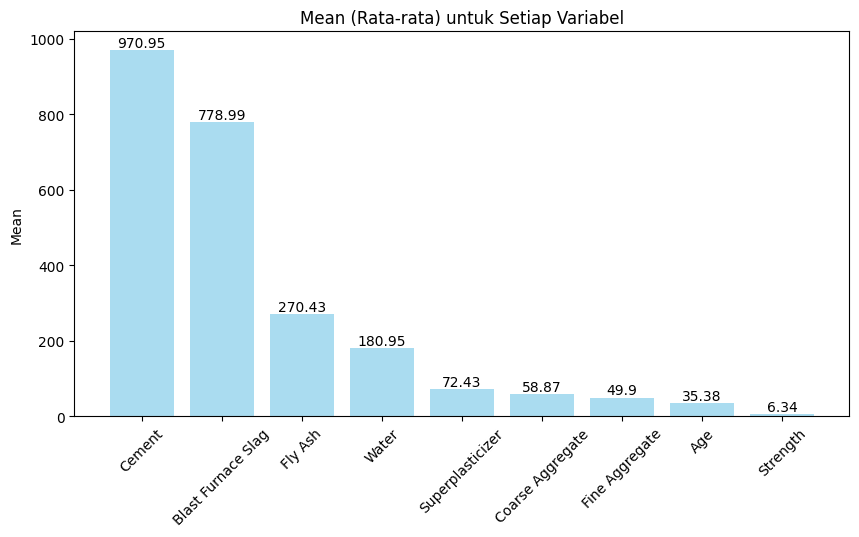

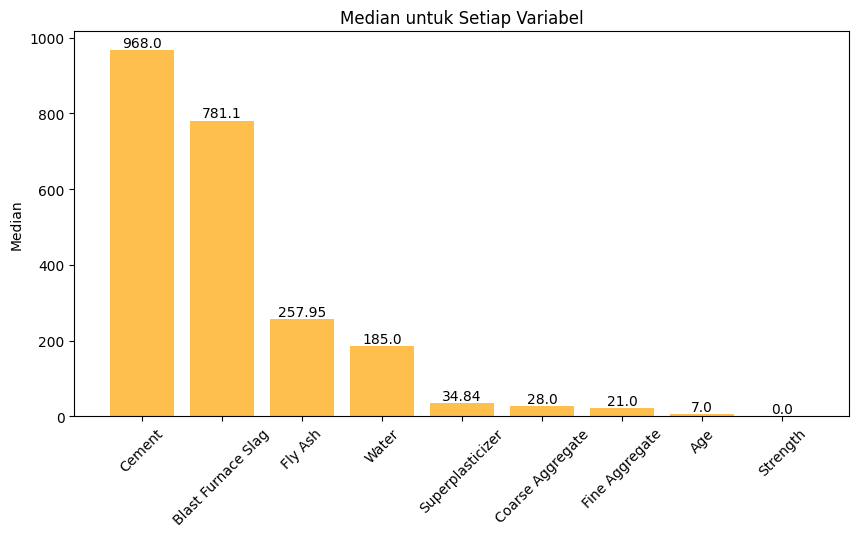

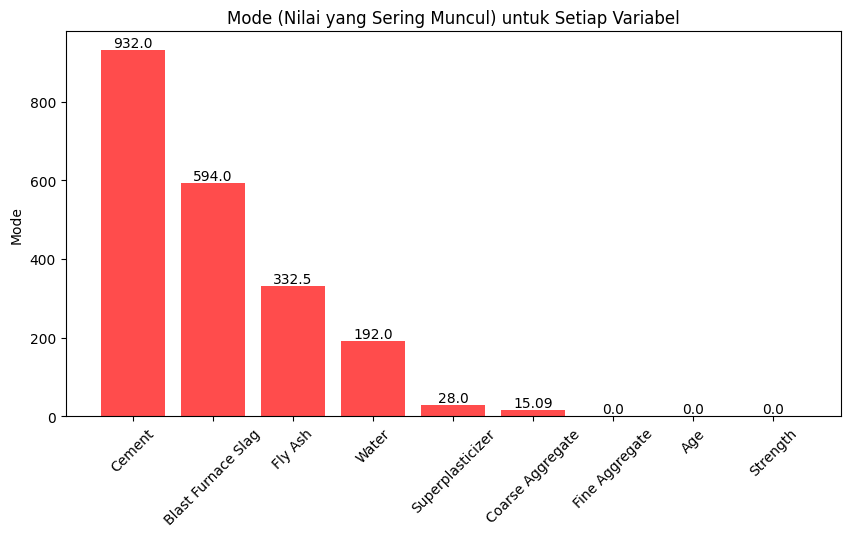

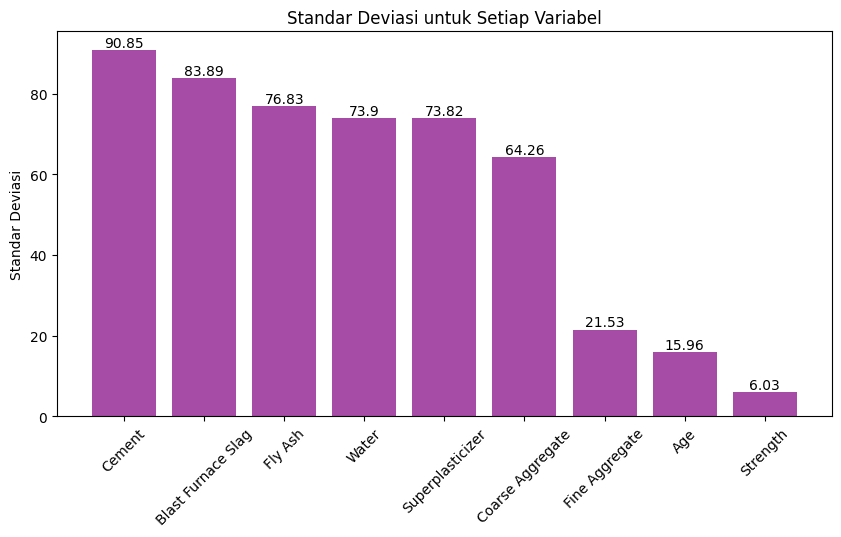

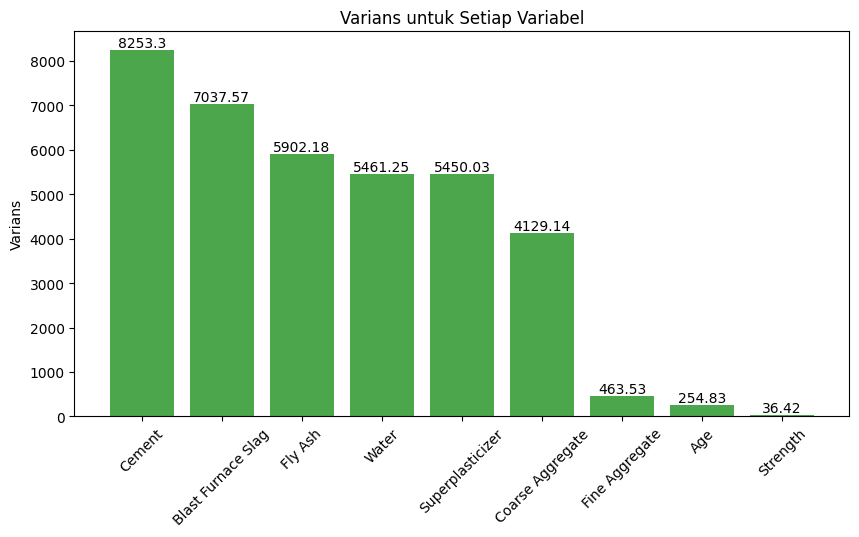

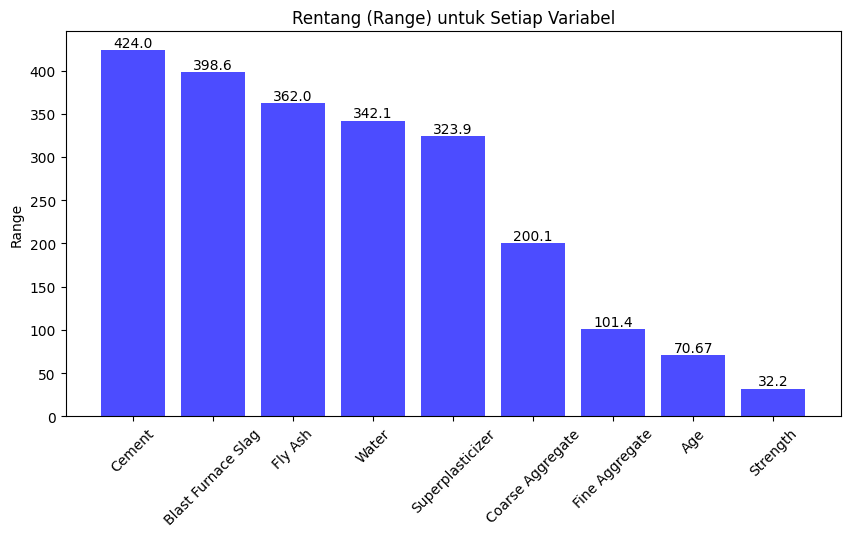

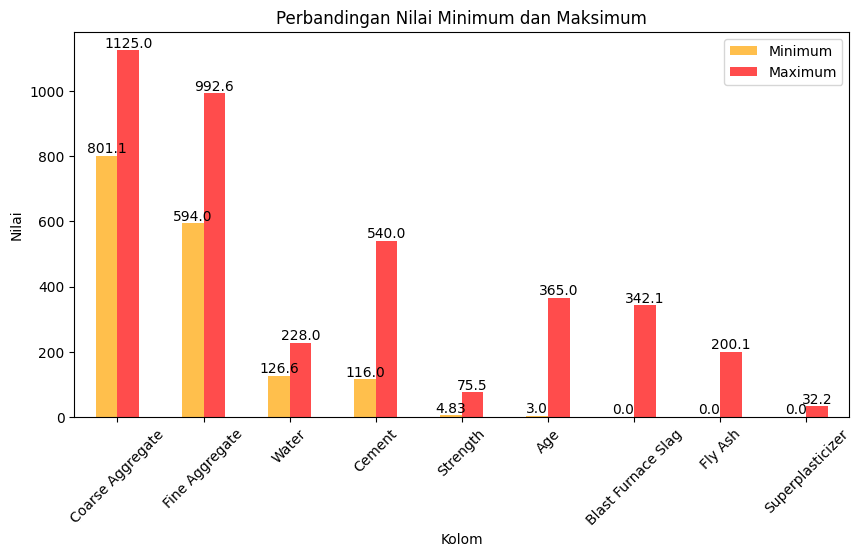

In [ ]:
# Visualisasi statistika deskriptif
# 1. Menghitung Tendensi Sentral dan Sebaran
mean_values = df.mean().sort_values(ascending=False)               # Mean
median_values = df.median().sort_values(ascending=False)           # Median
mode_values = df.mode().iloc[0].sort_values(ascending=False)       # Modus
std_values = df.std().sort_values(ascending=False)                 # Standar Deviasi
variance_values = df.var().sort_values(ascending=False)            # Varians
range_values = (df.max() - df.min()).sort_values(ascending=False)  # Range
min_values = df.min()                # Minimum
max_values = df.max()                # Maximum

# 2. Visualisasi Terpisah

# a. Mean
plt.figure(figsize=(10, 5))
bars = plt.bar(df.columns, mean_values, color='skyblue', alpha=0.7)
plt.title("Mean (Rata-rata) untuk Setiap Variabel")
plt.xticks(rotation=45)
plt.ylabel("Mean")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

# b. Median
plt.figure(figsize=(10, 5))
bars = plt.bar(df.columns, median_values, color='orange', alpha=0.7)
plt.title("Median untuk Setiap Variabel")
plt.xticks(rotation=45)
plt.ylabel("Median")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

# c. Mode
plt.figure(figsize=(10, 5))
bars = plt.bar(df.columns, mode_values, color='red', alpha=0.7)
plt.title("Mode (Nilai yang Sering Muncul) untuk Setiap Variabel")
plt.xticks(rotation=45)
plt.ylabel("Mode")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

# d. Standar Deviasi
plt.figure(figsize=(10, 5))
bars = plt.bar(df.columns, std_values, color='purple', alpha=0.7)
plt.title("Standar Deviasi untuk Setiap Variabel")
plt.xticks(rotation=45)
plt.ylabel("Standar Deviasi")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

# e. Varians
plt.figure(figsize=(10, 5))
bars = plt.bar(df.columns, variance_values, color='green', alpha=0.7)
plt.title("Varians untuk Setiap Variabel")
plt.xticks(rotation=45)
plt.ylabel("Varians")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

# f. Rentang (Range)
plt.figure(figsize=(10, 5))
bars = plt.bar(df.columns, range_values, color='blue', alpha=0.7)
plt.title("Rentang (Range) untuk Setiap Variabel")
plt.xticks(rotation=45)
plt.ylabel("Range")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

# g. Minimum dan Maksimum
data = pd.DataFrame({
    'Minimum': min_values,
    'Maximum': max_values
})
plt.figure(figsize=(10, 5))
bars = data.sort_values(by='Minimum', ascending=False).plot(kind='bar', ax=plt.gca(), color=['orange', 'red'], alpha=0.7)
plt.title('Perbandingan Nilai Minimum dan Maksimum')
plt.xlabel('Kolom')
plt.ylabel('Nilai')
plt.xticks(rotation=45)
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10, color='black')
plt.show()

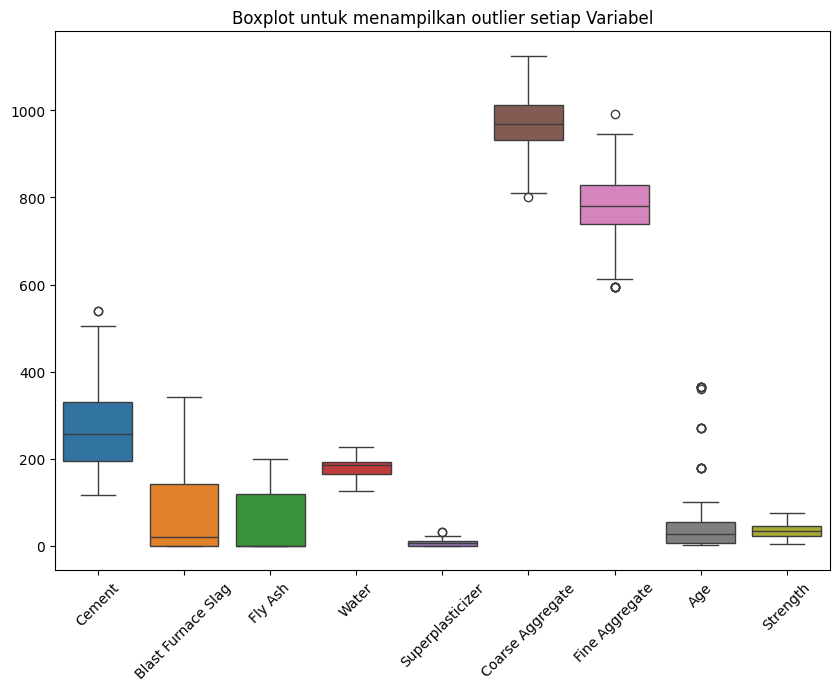

In [ ]:
# Boxplot untuk menampilkan outlier setiap variabel
plt.figure(figsize=(10, 7))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplot untuk menampilkan outlier setiap Variabel')
plt.show()

# Penanganan Outlier menggunakan Winsorization

In [ ]:
from scipy.stats.mstats import winsorize

# Terapkan winsorization pada setiap kolom numerik
winsorized_df = df.copy()
for col in df.select_dtypes(include=[float, int]).columns:
    winsorized_df[col] = winsorize(df[col], limits=[0.05, 0.05])
df = winsorized_df

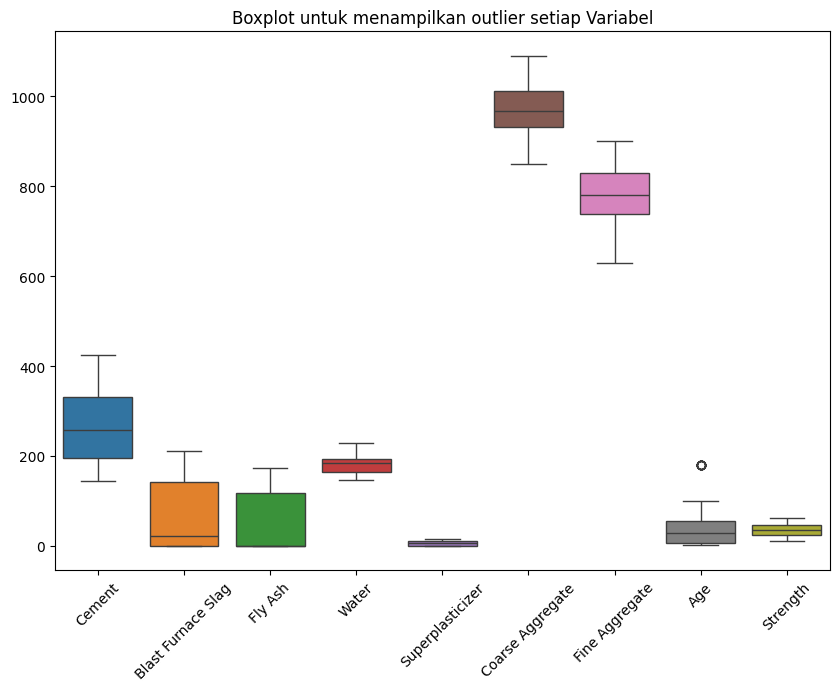

In [ ]:
# Boxplot untuk menampilkan outlier setiap variabel
plt.figure(figsize=(10, 7))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplot untuk menampilkan outlier setiap Variabel')
plt.show()

# Hubungan antar Variabel

In [ ]:
# Menghitung Korelasi Pearson antar variabel
correlation = df.corr()
correlation

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.175672,-0.378020,-0.068129,0.098376,-0.260671,-0.152349,0.021350,0.458434
Blast Furnace Slag,-0.175672,1.000000,-0.358547,0.205896,-0.046589,-0.317675,-0.417608,-0.052964,0.068059
Fly Ash,-0.378020,-0.358547,1.000000,-0.337157,0.543940,-0.001135,0.137750,-0.103365,0.083904
Water,-0.068129,0.205896,-0.337157,1.000000,-0.671675,-0.260187,-0.528670,0.285754,-0.280641
Superplasticizer,0.098376,-0.046589,0.543940,-0.671675,1.000000,-0.236865,0.248476,-0.228457,0.401283
Coarse Aggregate,-0.260671,-0.317675,-0.001135,-0.260187,-0.236865,1.000000,0.023794,0.040799,-0.132111
Fine Aggregate,-0.152349,-0.417608,0.137750,-0.528670,0.248476,0.023794,1.000000,-0.154767,-0.207344
Age,0.021350,-0.052964,-0.103365,0.285754,-0.228457,0.040799,-0.154767,1.000000,0.422578
Strength,0.458434,0.068059,0.083904,-0.280641,0.401283,-0.132111,-0.207344,0.422578,1.000000


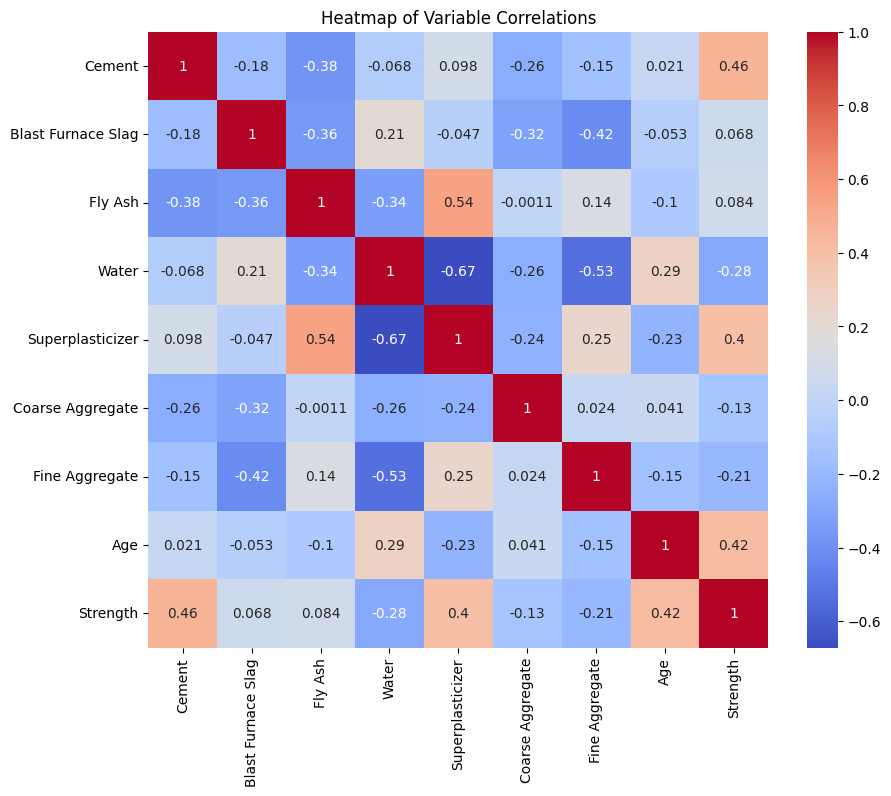

In [ ]:
# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap of Variable Correlations')
plt.show()

**Interpretasi:**

Heatmap di atas menunjukkan bahwa variabel **Cement**, **Age**, dan **Superplasticizer** memiliki korelasi yang kuat dan positif dengan variabel strength. Hal ini berarti peningkatan jumlah ketiga variabel ini cenderunh meningkatkan kekuatan beton. Sementara itu, variabel **blast furnace slag** dan **fly ash** menunjukkan korelasi positif yang lemah, yang mengindikasikan pengaruhnya terhadap kekuatan beton relatif kecil.

Lalu, variabel **Coarse Aggregate** dan **Fine Aggregate** menunjukkan korelasi negatif yang lemah dengan variabel strength. Hal ini berarti penambahan keduanya cenderung menurunkan kekuatan beton walaupun mungkin hanya sedikit.

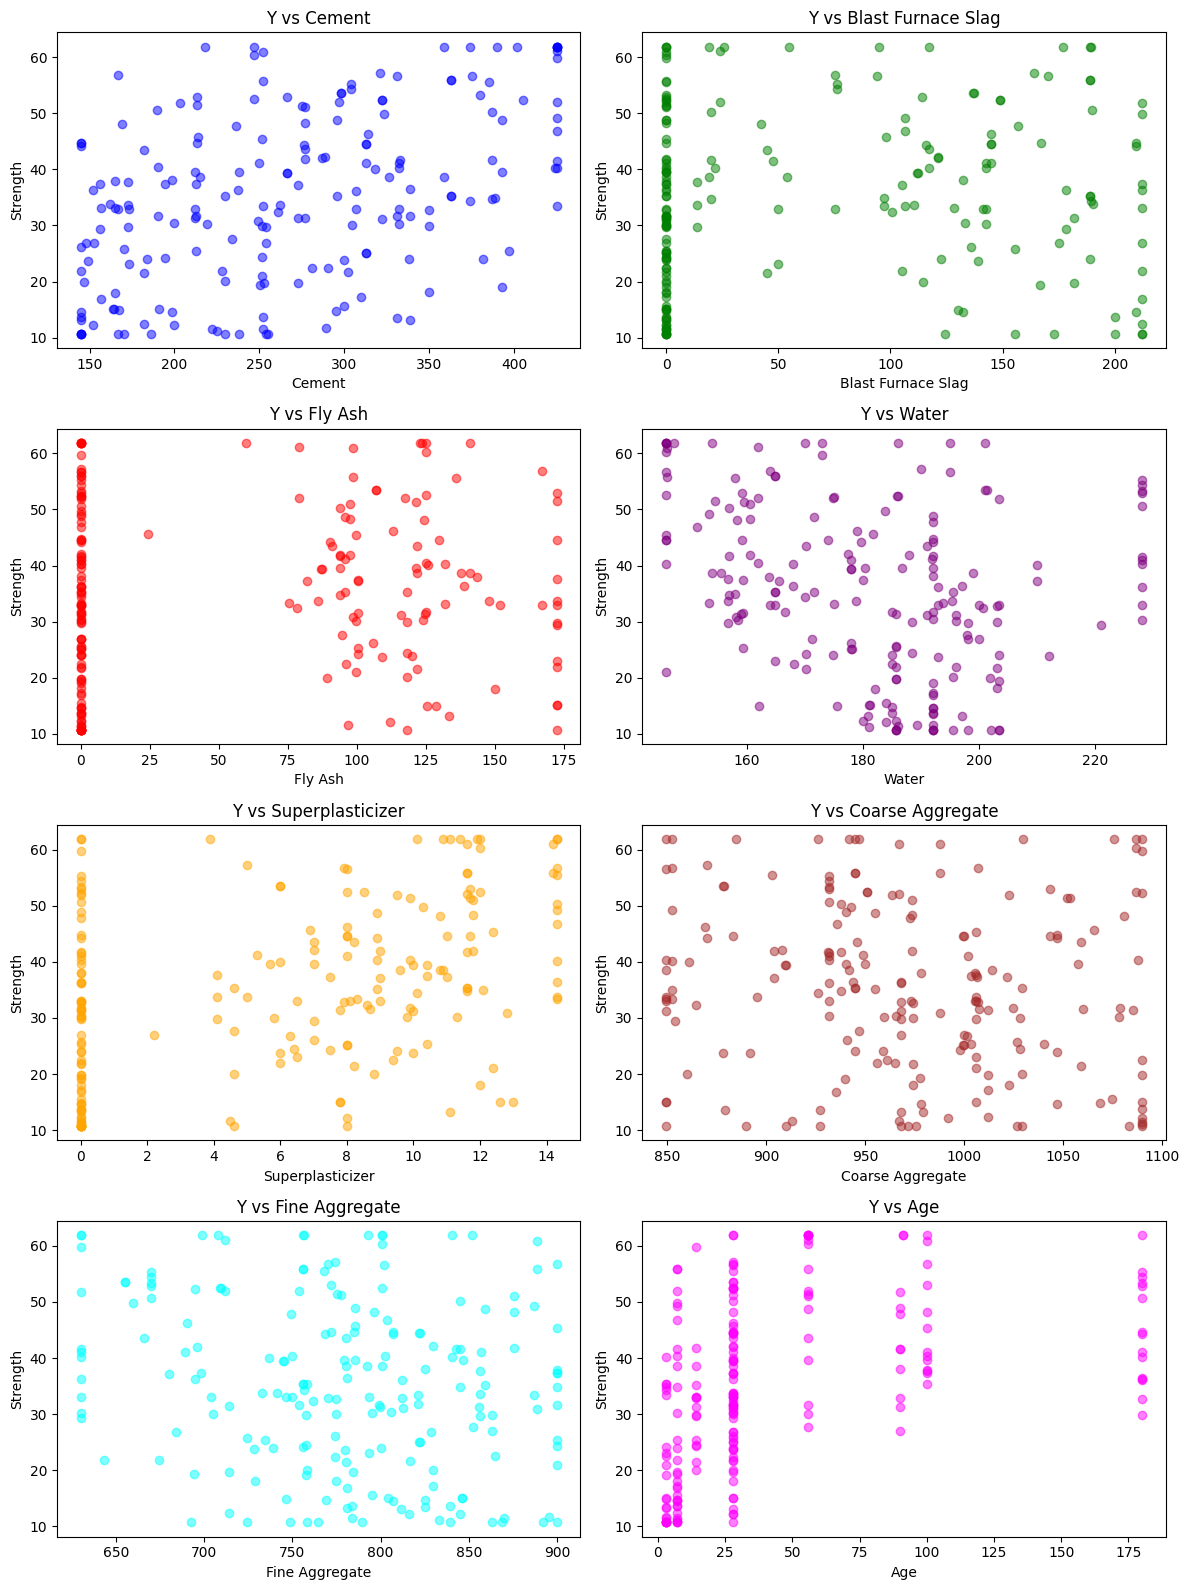

In [ ]:
X = df.drop(columns=['Strength'])  # Variabel independen
y = df['Strength']  # Variabel dependen (target)

plt.figure(figsize=(12, 16))

# Scatter plot Y vs X1 (Cement)
plt.subplot(4, 2, 1)
plt.scatter(X['Cement'], y, color='blue', alpha=0.5)
plt.title('Y vs Cement')
plt.xlabel('Cement')
plt.ylabel('Strength')

# Scatter plot Y vs X2 (Blast Furnace Slag)
plt.subplot(4, 2, 2)
plt.scatter(X['Blast Furnace Slag'], y, color='green', alpha=0.5)
plt.title('Y vs Blast Furnace Slag')
plt.xlabel('Blast Furnace Slag')
plt.ylabel('Strength')

# Scatter plot Y vs X3 (Fly Ash)
plt.subplot(4, 2, 3)
plt.scatter(X['Fly Ash'], y, color='red', alpha=0.5)
plt.title('Y vs Fly Ash')
plt.xlabel('Fly Ash')
plt.ylabel('Strength')

# Scatter plot Y vs X4 (Water)
plt.subplot(4, 2, 4)
plt.scatter(X['Water'], y, color='purple', alpha=0.5)
plt.title('Y vs Water')
plt.xlabel('Water')
plt.ylabel('Strength')

# Scatter plot Y vs X5 (Superplasticizer)
plt.subplot(4, 2, 5)
plt.scatter(X['Superplasticizer'], y, color='orange', alpha=0.5)
plt.title('Y vs Superplasticizer')
plt.xlabel('Superplasticizer')
plt.ylabel('Strength')

# Scatter plot Y vs X6 (Coarse Aggregate)
plt.subplot(4, 2, 6)
plt.scatter(X['Coarse Aggregate'], y, color='brown', alpha=0.5)
plt.title('Y vs Coarse Aggregate')
plt.xlabel('Coarse Aggregate')
plt.ylabel('Strength')

# Scatter plot Y vs X7 (Fine Aggregate)
plt.subplot(4, 2, 7)
plt.scatter(X['Fine Aggregate'], y, color='cyan', alpha=0.5)
plt.title('Y vs Fine Aggregate')
plt.xlabel('Fine Aggregate')
plt.ylabel('Strength')

# Scatter plot Y vs X8 (Age)
plt.subplot(4, 2, 8)
plt.scatter(X['Age'], y, color='magenta', alpha=0.5)
plt.title('Y vs Age')
plt.xlabel('Age')
plt.ylabel('Strength')

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()


# Model Regresi Linier Berganda

In [ ]:
x = df.drop(columns=['Strength'])
y = df['Strength']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     64.21
Date:                Sun, 22 Dec 2024   Prob (F-statistic):           4.32e-50
Time:                        05:11:18   Log-Likelihood:                -694.96
No. Observations:                 200   AIC:                             1408.
Df Residuals:                     191   BIC:                             1438.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 32.8360     50

Y Topi = β0 + β1X1 + β2X2 + β3X3 + β4X4 + β5X5 + β6X6 + β7X7 + β8X8

Strength = 32.8360  + 0.1073(Cement) + 0.0703(Blast Furnace Slag) + 0.0794(Fly Ash) − 0.2283(Water) + 0.4278(Superplasticizer) + 0.0162(Coarse Aggregate) − 0.0261(Fine Aggregate) + 0.1766(Age)

**Interpretasi :**

Dari model diatas didapatkan **R-Squared** sebesar **0.729** yang artinya sekitar 72,9% variasi dalam variabel dependen (Strength) dapat dijelaskan oleh variabel independen dalam model. Nilai ini cukup baik dan menunjukkan bahwa model memiliki kemampuan yang cukup untuk menjelaskan data. **Adjusted R-Squared** sebesar **0.718**, sedikit lebih rendah dibanding R-Squared yang wajar karena disesuaikan dengan jumlah variabel independen. Nilai ini menunjukkan model yang cukup kuat.

Sehingga model ini cukup baik dalam menjelaskan kekuatan beton (Strength) berdasarkan variabel independennya, terutama Cement, Blast Furnace Slag, Fly Ash, Water, dan Age. Namun, ada beberapa variabel seperti Superplasticizer, Coarse Aggregate, dan Fine Aggregate yang tidak signifikan secara statistik, sehingga dapat mempertimbangkan untuk mengevaluasi ulang apakah data tersebut perlu digunakan dalam model.

In [ ]:
# Menghasilkan nilai prediksi
prediksi = model.predict(x)
print(prediksi)

0      46.698336
1      49.112847
2      61.199822
3      48.406285
4      15.365956
         ...    
195    33.895945
196    47.572865
197    24.939582
198    18.551912
199    22.263709
Length: 200, dtype: float64


In [ ]:
# Menghasilkan nilai residual
residual = model.resid
print(residual)

0       6.211664
1       6.787153
2       0.660178
3     -13.106285
4      -4.635956
         ...    
195    -0.995945
196    12.747135
197    -9.849582
198     1.438088
199     3.466291
Length: 200, dtype: float64


# Uji Hipotesis

## Uji F

In [ ]:
from scipy.stats import f

# Mengambil nilai R-squared dan nilai k
R_squared = model.rsquared
k = len(model.params) - 1
n = len(df['Strength'])

# Hitung statistik F
f_hit = (R_squared / k) / ((1 - R_squared) / (n - k - 1))
p_value = 1 - f.cdf(f_hit, k, n - k - 1)
tabel_f = f.ppf(1 - 0.05, k, n - k - 1)

# Hasil uji F
results_F = pd.DataFrame({
    'F hitung': f_hit,
    'p_value': p_value,
    'F tabel': tabel_f,
    'Hypothesis_Test': ['H0 ditolak' if p_value < 0.05 else 'H0 gagal ditolak']
})

# Menampilkan hasil
results_F

,F hitung,p_value,F tabel,Hypothesis_Test
0,64.213591,1.110223e-16,1.987138,H0 ditolak


**Interpretasi:**

Berdasarkan output di atas nilai F hitung = 64.21 lebih besar daripada F tabel = 1.99 dan juga nilai p-value = 1.11e-16 kurang dari 0.05. Sehingga, dapat disimpulkan bahwa **H0 ditolak**. Artinya minimal terdapat satu variabel independen yang berpengaruh terhadap variabel dependen.

## Uji Z

In [ ]:
# Mengambil koefisien dan standar error tanpa konstanta
coefficients = model.params[1:]
std_errors = model.bse[1:]

# Menghitung z statistik dan p-value
z_hit = coefficients / std_errors
p_values_z = [2 * (1 - norm.cdf(abs(z))) for z in z_hit]

# Hasil uji Z
results_z = pd.DataFrame({
    'Coefficient': coefficients,
    'Std_Error': std_errors,
    'Z hitung': z_hit,
    'p_value': p_values_z,
    'Hypothesis_Test': ['H0 ditolak' if p < 0.05 else 'H0 gagal ditolak' for p in p_values_z]
})

# Menampilkan hasil
results_z

,Coefficient,Std_Error,Z hitung,p_value,Hypothesis_Test
Cement,0.107328,0.017085,6.282156,3.339100e-10,H0 ditolak
Blast Furnace Slag,0.070293,0.018839,3.731306,1.904898e-04,H0 ditolak
Fly Ash,0.079426,0.023206,3.422703,6.200179e-04,H0 ditolak
Water,-0.228326,0.077391,-2.950287,3.174794e-03,H0 ditolak
Superplasticizer,0.427756,0.223622,1.912855,5.576665e-02,H0 gagal ditolak
Coarse Aggregate,0.016163,0.018901,0.855100,3.924956e-01,H0 gagal ditolak
Fine Aggregate,-0.026120,0.019364,-1.348910,1.773658e-01,H0 gagal ditolak
Age,0.176640,0.012493,14.139352,0.000000e+00,H0 ditolak


**Interpretasi :**

- Variabel Cement

Berdasarkan output di atas, nilai p-value = 3.339100e-10 lebih kecil dari tingkat signifikansi. Sehingga, dapat disimpulkan bahwa H0 ditolak. Artinya variabel Cement berpengaruh signifikan terhadap Strength.

- Variabel Blast Furnace Slag

Berdasarkan output di atas, nilai p-value = 1.904898e-04 lebih kecil dari tingkat signifikansi. Sehingga, dapat disimpulkan bahwa H0 ditolak. Artinya variabel Blast Furnace Slag berpengaruh signifikan terhadap Strength.

- Variabel Fly Ash

Berdasarkan output di atas, nilai p-value = 6.200179e-04, yang lebih kecil dari tingkat signifikansi. Sehingga, dapat disimpulkan bahwa H0 ditolak. Artinya variabel Fly Ash berpengaruh signifikan terhadap Strength.

- Variabel Water

Berdasarkan output di atas, nilai p-value = 3.174794e-03, yang lebih kecil dari tingkat signifikansi Sehingga, dapat disimpulkan bahwa H0 ditolak. Artinya variabel Water berpengaruh signifikan terhadap Strength.

- Variabel Superplasticizer

Berdasarkan output di atas, nilai p-value = 5.576665e-02, yang lebih besar dari tingkat signifikansi. Sehingga, dapat disimpulkan bahwa H0 gagal ditolak. Artinya variabel Superplasticizer tidak memiliki pengaruh signifikan terhadap Strength.

- Variabel Coarse Aggregate

Berdasarkan output di atas, nilai p-value = 3.924956e-01, yang lebih besar dari tingkat signifikansi. Sehingga, dapat disimpulkan bahwa H0 gagal ditolak. Artinya variabel Coarse Aggregate tidak memiliki pengaruh signifikan terhadap Strength.

- Variabel Fine Aggregate

Berdasarkan output di atas, nilai p-value = 1.773658e-01, yang lebih besar dari tingkat signifikansi. Sehingga, dapat disimpulkan bahwa H0 gagal ditolak. Artinya variabel Fine Aggregate tidak memiliki pengaruh signifikan terhadap Strength.

- Variabel Age

Berdasarkan output di atas, nilai p-value = 0.000000e+00, yang lebih kecil dari tingkat signifikansi. Sehingga, dapat disimpulkan bahwa H0 ditolak. Artinya variabel Age berpengaruh signifikan terhadap Strength.

# Model Regresi Linier Berganda dengan Variabel yang Signifikan

In [ ]:
x = df[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Age']]
y = df['Strength']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     95.87
Date:                Sun, 22 Dec 2024   Prob (F-statistic):           1.67e-50
Time:                        05:11:19   Log-Likelihood:                -701.07
No. Observations:                 200   AIC:                             1414.
Df Residuals:                     194   BIC:                             1434.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 28.8944      6

Y Topi = β0 + β1X1 + β2X2 + β3X3 + β4X4 + β5X5

Strength = 28.8944 + 0.1189(Cement) + 0.0852(Blast Furnace Slag) + 0.1044(Fly Ash) - 0.2500(Water) + 0.1802(Age)


**Interpretasi:**

Dari model diatas didapatkan Adjusted R-Squared sebesar 0.704, artinya sebesar 70,4% variasi dalam model dapat dijelaskan oleh variabel independen dalam model. Nilai ini sedikit lebih rendah dibanding R-Squared. Hal ini wajar karena nilai Adjusted R-Squared disesuaikan dengan jumlah variabel independen.

In [ ]:
# Mengambil nilai R-squared dan nilai k
R_squared = model.rsquared
k = len(model.params) - 1
n = len(df['Strength'])

# Hitung statistik F
f_hit = (R_squared / k) / ((1 - R_squared) / (n - k - 1))
p_value = 1 - f.cdf(f_hit, k, n - k - 1)
tabel_f = f.ppf(1 - 0.05, k, n - k - 1)

# Hasil uji F
results_F = pd.DataFrame({
    'F hitung': f_hit,
    'p_value': p_value,
    'F tabel': tabel_f,
    'Hypothesis_Test': ['H0 ditolak' if p_value < 0.05 else 'H0 gagal ditolak']
})

# Menampilkan hasil
results_F

,F hitung,p_value,F tabel,Hypothesis_Test
0,95.870606,1.110223e-16,2.260647,H0 ditolak


**Interpretasi:**

Berdasarkan output di atas nilai F hitung = 95.87 lebih besar daripada F tabel = 2.26 dan juga nilai p-value = 1.11e-16 kurang dari 0.05. Sehingga, dapat disimpulkan bahwa H0 ditolak. Artinya minimal terdapat satu variabel independen yang berpengaruh terhadap variabel dependen.

In [ ]:
# Mengambil koefisien dan standar error tanpa konstanta
coefficients = model.params[1:]
std_errors = model.bse[1:]

# Menghitung z statistik dan p-value
z_hit = coefficients / std_errors
p_values_z = [2 * (1 - norm.cdf(abs(z))) for z in z_hit]

# Hasil uji Z
results_z = pd.DataFrame({
    'Coefficient': coefficients,
    'Std_Error': std_errors,
    'Z hitung': z_hit,
    'p_value': p_values_z,
    'Hypothesis_Test': ['H0 ditolak' if p < 0.05 else 'H0 gagal ditolak' for p in p_values_z]
})

# Menampilkan hasil
results_z

,Coefficient,Std_Error,Z hitung,p_value,Hypothesis_Test
Cement,0.118926,0.008132,14.623880,0.000000e+00,H0 ditolak
Blast Furnace Slag,0.085221,0.008566,9.948625,0.000000e+00,H0 ditolak
Fly Ash,0.104390,0.011948,8.736896,0.000000e+00,H0 ditolak
Water,-0.250020,0.031844,-7.851470,4.218847e-15,H0 ditolak
Age,0.180213,0.012704,14.185194,0.000000e+00,H0 ditolak


**Interpretasi:**

- Variabel Cement

Berdasarkan output di atas, nilai p-value = 0.000000e+00	 lebih kecil dari tingkat signifikansi. Sehingga, dapat disimpulkan bahwa H0 ditolak. Artinya variabel Cement berpengaruh signifikan terhadap Strength.
- Variabel Blast Furnace Slag

Berdasarkan output di atas, nilai p-value = 0.000000e+00 lebih kecil dari tingkat signifikansi. Sehingga, dapat disimpulkan bahwa H0 ditolak. Artinya variabel Blast Furnace Slag berpengaruh signifikan terhadap Strength.
- Variabel Fly Ash

Berdasarkan output di atas, nilai p-value = 0.000000e+00, yang lebih kecil dari tingkat signifikansi. Sehingga, dapat disimpulkan bahwa H0 ditolak. Artinya variabel Fly Ash berpengaruh signifikan terhadap Strength.
- Variabel Water

Berdasarkan output di atas, nilai p-value = 4.218847e-15, yang lebih kecil dari tingkat signifikansi Sehingga, dapat disimpulkan bahwa H0 ditolak. Artinya variabel Water berpengaruh signifikan terhadap Strength.
- Variabel Age

Berdasarkan output di atas, nilai p-value = 0.000000e+00, yang lebih kecil dari tingkat signifikansi. Sehingga, dapat disimpulkan bahwa H0 ditolak. Artinya variabel Age berpengaruh signifikan terhadap Strength.

# Uji Asumsi Residual

## Memeriksa asumsi residual berdistribusi normal

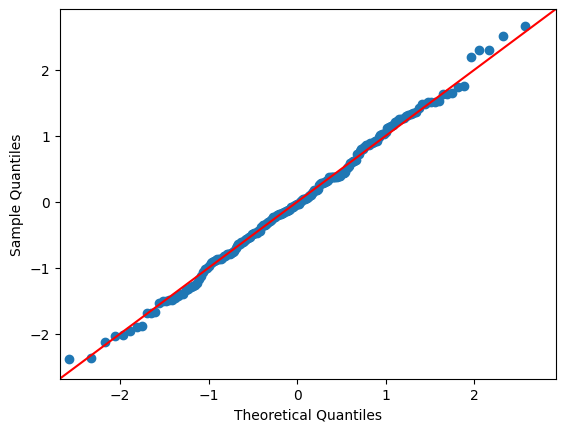

In [ ]:
# Menggambar Plot QQ menggunakan package statmodels
fig = sm.qqplot(residual, stats.t, fit=True, line='45')
plt.show()

**Interpretasi:**

Berdasarkan Scatter plot siatas yang merupakan plot untuk memeriksa asumsi residual dapat dinyatakan bahwa titik-titik distribusi data tidak jauh dari garis linier, oleh karena itu dapat disimpulkan bahwa data residual memenuhi asumsi berdistribusi normal, selanjutnya akan di uji menggunakan uji Jarque-Bera.

In [ ]:
# Pengujian Jarque Bera untuk memeriksa asumsi residual

# Hipotesis null dan hipotesis alternatif
H0 = 'data berdistribusi normal'
H1 = 'data tidak berdistribusi normal'

# Menentukan level signifikansi
alpha = 0.05

# Menentukan statistik uji
name = ['Jarque-Bera', 'p-value', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
print(lzip(name, test))

dk = 8 # Derajat kebebasan
tabel_chi_square = stats.chi2.ppf(1 - alpha, dk)
print('Tabel chi-square:', tabel_chi_square)

[('Jarque-Bera', 0.7962978778474743), ('p-value', 0.6715619984917982), ('Skew', 0.13638634121460474), ('Kurtosis', 2.8545668226914143)]
Tabel chi-square: 15.50731305586545


**Interpretasi:**

Berdasarkan hasil uji Jarque-Bera, diperoleh nilai statistik Jarque-Bera sebesar 0.7963 dengan p-value sebesar 0.6716. Nilai ini menunjukkan bahwa statistik JB lebih kecil dari nilai chi-square tabel sebesar 15.5073, dan p-value lebih besar dari 0.05. Sehingga, dapat disimpulkan bahwa H0 gagal ditolak, yang artinya residual dalam model berdistribusi normal. Selain itu, nilai skewness sebesar 0.1364 menunjukkan distribusi residual cenderung ke arah kanan, dan nilai kurtosis sebesar 2.8546 mendekati nilai ideal distribusi normal (kurtosis = 3). Oleh karena itu, asumsi normalitas residual terpenuhi, sehingga analisis regresi dapat dilanjutkan dengan menggunakan asumsi ini.


## Memeriksa asumsi residual tidak terjadi autokorelasi

Text(0, 0.5, 'Residual')

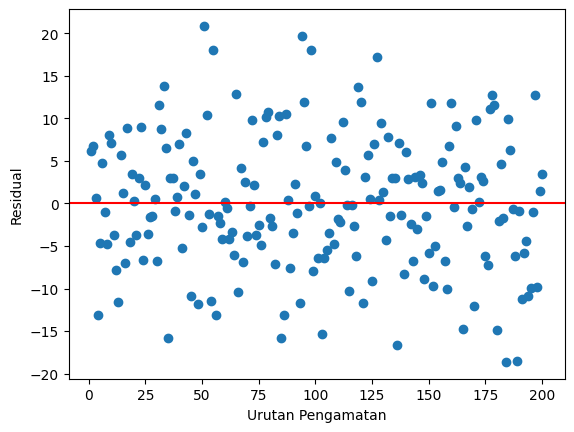

In [ ]:
# Plot memeriksa asumsi residual tidak terjadi autokorelasi
urutan_pengamatan = pd.Series(range(1, len(residual) + 1))
plt.scatter(urutan_pengamatan, residual)
plt.axhline(0, color='red')
plt.xlabel('Urutan Pengamatan')
plt.ylabel('Residual')


**Interpretasi:**

Berdasarkan scatter plot yang ditampilkan, terlihat bahwa titik-titik data residual tersebar secara acak dan tidak membentuk pola tertentu, seperti pola linier, kurva, atau siklus yang teratur. Penyebaran acak ini mengindikasikan bahwa residual **tidak terjadi korelasi** satu sama lain, atau dengan kata lain, tidak ada hubungan sistematis antar residual dari satu observasi ke observasi lainnya. Hal ini menunjukkan bahwa asumsi tidak terjadinya autokorelasi dalam data residual terpenuhi.

In [ ]:
# Pengujian Durbin-Watson
from statsmodels.stats.stattools import durbin_watson

# Hipotesis null dan hipotesis alternatif
H0 = 'tidak terjadi autokorelasi'
H1 = 'terjadi autokorelasi'

# Menentukan level signifikansi
alpha = 0.05

# Menentukan statistik uji
dw = durbin_watson(model.resid)
print(f'Durbin-Watson: {dw}')

Durbin-Watson: 2.1163485981257306


**Interpretasi:**

Berdasarkan pengujian Durbin-Watson, diperoleh nilai DW = 2.1164, dengan batas bawah (dL) sebesar 1.6861 dan batas atas (dU) sebesar 1.8522. Berdasarkan kriteria tersebut, kita dapat menarik kesimpulan sebagai berikut:
- Jika DW < dL: H0 ditolak, yang menunjukkan adanya autokorelasi positif pada residual.
- Jika DW > dU: H0 gagal ditolak, yang menunjukkan tidak adanya autokorelasi.
- Jika dL<DW<dU: Tidak dapat disimpulkan apakah ada autokorelasi atau tidak, karena berada di antara batas bawah dan batas atas.

Dalam hal ini didapatkan bahwa DW (2.1164) > dU (1.8522), yang berarti H0 gagal ditolak, jadi hal ini memenuhi asumsi bahwa tidak terjadi autokorelasi.


## Memeriksa asumsi residual tidak terjadi heteroskedastisitas

(7.774292752893, 71.90653735116389)

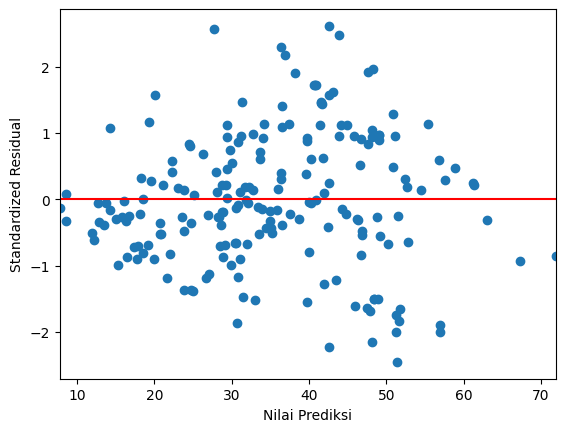

In [ ]:
# Plot memeriksa asumsi residual tidak terjadi heteroskedastisitas
influence = model.get_influence()

# Menentukan standardized residualnya
std_residual = influence.resid_studentized_internal
plt.scatter(prediksi, std_residual)
plt.axhline(0, color="red")
plt.xlabel("Nilai Prediksi")
plt.ylabel("Standardized Residual")
plt.xlim([min(prediksi), max(prediksi)])

**Interpretasi:**

Pada grafik di atas terlihat bahwa semakin meningkat nilai prediksinya akan meningkatkan varians residual. Hal ini berarti data residual terjadi heteroskedastisitas yang artinya varians errornya tidak konsisten.

In [ ]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

# Melakukan regresi dari nilai absolut residual terhadap variabel independen
abs_residual = np.abs(residual)
uji_gletser = sm.OLS(abs_residual, x).fit()

# Hasil uji Glejser
print(uji_gletser.summary())

# Interpretasi
p_values = uji_gletser.pvalues[1:]  # Mengambil nilai p-values
significant_var = [x.columns[i] for i, p in enumerate(p_values, start=1) if p < 0.05]

print('\nKesimpulan:')
if significant_var:
    print(f"Variabel yang signifikan terhadap heteroskedastisitas: {', '.join(significant_var)}")
    print("Terdapat indikasi adanya heteroskedastisitas.")
else:
    print("Tidak ditemukan indikasi heteroskedastisitas.")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     3.205
Date:                Sun, 22 Dec 2024   Prob (F-statistic):            0.00837
Time:                        05:11:21   Log-Likelihood:                -586.19
No. Observations:                 200   AIC:                             1184.
Df Residuals:                     194   BIC:                             1204.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.8819      3

### Penanganan menggunakan transformasi

In [ ]:
# Transformasi log pada variabel dependen
df['Strength_log'] = np.log(df['Strength'])

# Refit model dengan variabel tertransformasi
model_log = sm.OLS(df['Strength_log'], sm.add_constant(x)).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:           Strength_log   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     94.40
Date:                Sun, 22 Dec 2024   Prob (F-statistic):           4.82e-50
Time:                        05:11:21   Log-Likelihood:                -24.340
No. Observations:                 200   AIC:                             60.68
Df Residuals:                     194   BIC:                             80.47
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0569      0

In [ ]:
# Menghasilkan nilai prediksi
prediksi_log = model_log.predict(x)
print(prediksi_log)

0      3.821683
1      3.853793
2      4.235075
3      3.829378
4      2.949627
         ...   
195    3.440716
196    3.770414
197    3.186079
198    2.964086
199    2.951845
Length: 200, dtype: float64


### Memeriksa kembali setelah penanganan

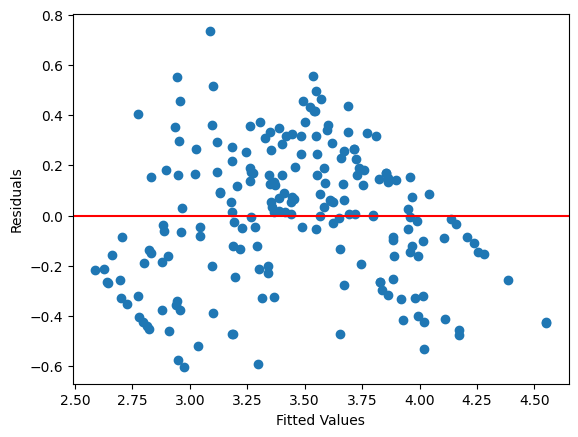

In [ ]:
# Residual dari model WLS
residual_log = model_log.resid
fitted_log = model_log.fittedvalues

# Plot Residual vs. Fitted Values
plt.scatter(fitted_log, residual_log)
plt.axhline(0, color='red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

**Interpretasi:**

Grafik di atas menunjukkan bahwa data menyebar secara random. Berdasarkan hal itu, maka memenuhi asumsi residual tidak terjadi heteroskedastisitas yang artinya varians residualnya konstan.

In [ ]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

# Melakukan regresi dari nilai absolut residual terhadap variabel independen
abs_residual = np.abs(residual_log)
uji_gletser = sm.OLS(abs_residual, x).fit()

# Hasil uji Glejser
print(uji_gletser.summary())

# Interpretasi
p_values = uji_gletser.pvalues[1:]  # Mengambil nilai p-values
significant_var = [x.columns[i] for i, p in enumerate(p_values, start=1) if p < 0.05]

print('\nKesimpulan:')
if significant_var:
    print(f"Variabel yang signifikan terhadap heteroskedastisitas: {', '.join(significant_var)}")
    print("Terdapat indikasi adanya heteroskedastisitas.")
else:
    print("Tidak ditemukan indikasi heteroskedastisitas.")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     2.272
Date:                Sun, 22 Dec 2024   Prob (F-statistic):             0.0490
Time:                        05:11:22   Log-Likelihood:                 94.229
No. Observations:                 200   AIC:                            -176.5
Df Residuals:                     194   BIC:                            -156.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2645      0

**Interpretasi:**

Pada tahap awal, dilakukan pemeriksaan menggunakan scatter plot residual terhadap nilai prediksi untuk mendeteksi adanya heteroskedastisitas. Kemudian dilakukan uji Glejser untuk memeriksa kembali asumsi ini. Hasil uji Glejser menujukkan bahwa terdapat beberapa variabel independen yang memiliki p-value signifikan (p-value < 0.05), artinya **variabel Blast Furnace Slag dan Age berkontribusi terhadap terjadinya heteroskedastisitas** dalam model.

Setelah dilakukan penanganan, hasil dari uji Glejser menunjukkan bahwa beberapa variabel independen memiliki p-value yang lebih besar dari 0.05. Sehingga, **H0 gagal ditolak, menunjukkan bahwa tidak lagi ditemukan indikasi heteroskedastisitas pada model tertransformasi**. Transformasi logaritma pada variabel dependen ini berhasil mengatasi masalah heteroskedastisitas.

## Memeriksa asumsi tidak terjadi multikolinieritas

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

# Menghitung VIF setiap variabel
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

print(vif_data)

              feature         VIF
0               const  143.484514
1              Cement    1.398854
2  Blast Furnace Slag    1.338368
3             Fly Ash    1.697769
4               Water    1.285115
5                 Age    1.107162


**Interpretasi:**

Berdasarkan hasil uji VIF, dapat disimpulkan bahwa tidak ada indikasi adanya multikolinearitas yang tinggi antara variabel-variabel independen dalam model regresi. Hal ini berarti model regresi yang digunakan dapat dipercaya dalam hal kestabilan estimasi koefisiennya.